In [4]:
# 1 ЗАВДАННЯ

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install lxml



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]


In [5]:
# 1. Вивести перших 5 рядків.
print(df.head())

  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  110064915       2024      105435540       2023   
1     United States   29167779       2024       27360935       2023   
2             China   18273357  [n 1]2024       17794782  [n 3]2023   
3           Germany    4710032       2024        4456081       2023   
4             Japan    4070094       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


In [6]:
# 2. Визначити розмір датасета.
print(df.shape)

(210, 7)


In [7]:
# 3. Визначити оптимальну кількість стовпців.
print("Стовпці:", df.columns)

Стовпці: MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )


In [8]:
# 4.Змінити назви стовпців на більш зручні.
df.columns = ['Country', 'MVF_2024', 'Year_MVF', 'WorldBank_2023', 'Year_WorldBank', 'OON_2022', 'Year_OON']
print(df.head())

         Country   MVF_2024   Year_MVF WorldBank_2023 Year_WorldBank  \
0          World  110064915       2024      105435540           2023   
1  United States   29167779       2024       27360935           2023   
2          China   18273357  [n 1]2024       17794782      [n 3]2023   
3        Germany    4710032       2024        4456081           2023   
4          Japan    4070094       2024        4212945           2023   

    OON_2022   Year_OON  
0  100834796       2022  
1   25744100       2022  
2   17963170  [n 1]2022  
3    4076923       2022  
4    4232173       2022  


In [9]:
# 5. Визначити тип даних.
print(df.dtypes)


Country           object
MVF_2024          object
Year_MVF          object
WorldBank_2023    object
Year_WorldBank    object
OON_2022          object
Year_OON          object
dtype: object


In [10]:
# 6. Замінити у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень.
df.replace("—", np.nan, inplace=True)
print(df.isnull().sum())

# 6.1 При наявності, замінити пропущені значення на середнє значення тільки для числових стовпців.
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.isnull().sum())

Country            0
MVF_2024          15
Year_MVF          15
WorldBank_2023     8
Year_WorldBank     8
OON_2022           1
Year_OON           1
dtype: int64
Country            0
MVF_2024          15
Year_MVF          15
WorldBank_2023     8
Year_WorldBank     8
OON_2022           1
Year_OON           1
dtype: int64


In [11]:
# 7. Ще раз перевірити наявність пропущених значень.
print(df.isnull().sum())


Country            0
MVF_2024          15
Year_MVF          15
WorldBank_2023     8
Year_WorldBank     8
OON_2022           1
Year_OON           1
dtype: int64


In [12]:
# 8. Перевірити наявність дублікатів. При наявності видалити дублікати.
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0
0


In [13]:
# 9. Вивести описову статистику датасету describe()
print(df.describe())

       Country   MVF_2024 Year_MVF WorldBank_2023 Year_WorldBank   OON_2022  \
count      210        195      195            202            202        209   
unique     210        195       12            202              9        209   
top      World  110064915     2024      105435540           2023  100834796   
freq         1          1      182              1            180          1   

       Year_OON  
count       209  
unique        8  
top        2022  
freq        202  


In [22]:
# Переконайтеся, що стовпці є рядковими
df['MVF_2024'] = df['MVF_2024'].astype(str)
df['WorldBank_2023'] = df['WorldBank_2023'].astype(str)

# Перетворення стовпців на числовий формат
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'].str.replace(',', '').str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'].str.replace(',', '').str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# Визначення відхилення (різниці) між показниками MVF_2024 та WorldBank_2023 для кожної країни.
df['Deviation_MVF_WorldBank'] = df['MVF_2024'] - df['WorldBank_2023']

# Виведення результатів
print(df[['Country', 'Deviation_MVF_WorldBank']].sort_values(by='Deviation_MVF_WorldBank', ascending=False).head())


         Country  Deviation_MVF_WorldBank
0          World                4629375.0
1  United States                1806844.0
2          China                 478575.0
5          India                 339211.0
3        Germany                 253951.0


In [27]:
# 11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та UN_2022.
correlation = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(correlation)

                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999973  0.999851
WorldBank_2023  0.999973        1.000000  0.999932
OON_2022        0.999851        0.999932  1.000000


In [30]:
# Перетворення стовпця 'OON_2022' на числовий формат
df['OON_2022'] = pd.to_numeric(df['OON_2022'].str.replace(',', '').str.extract('(\d+\.?\d*)')[0], errors='coerce')

# 12. Обчисліть середнє значення для кожного стовпця.
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print(mean_values)


MVF_2024          1.128819e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64


In [ ]:
# 13. Обчисліть стандартне відхилення показників для кожної країни.
df['Std_Dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
print(df[['Country', 'Std_Dev']].sort_values(by='Std_Dev', ascending=False).head())


          Country       Std_Dev
0           World  4.349674e+06
1   United States  1.519553e+06
2           China  3.866667e+05
12         Mexico  2.782759e+05
3         Germany  2.665736e+05


In [ ]:
# 14. Визначення країни з найвищим та найнижчим показниками у кожному з років
print("MVF_2024 (максимум):", df.loc[df['MVF_2024'].idxmax()])
print("WorldBank_2023 (максимум):", df.loc[df['WorldBank_2023'].idxmax()])
print("UN_2022 (максимум):", df.loc[df['OON_2022'].idxmax()])

print("MVF_2024 (мінімум):", df.loc[df['MVF_2024'].idxmin()])
print("WorldBank_2023 (мінімум):", df.loc[df['WorldBank_2023'].idxmin()])
print("UN_2022 (мінімум):", df.loc[df['OON_2022'].idxmin()])


MVF_2024 (максимум): Country                             World
MVF_2024                      109529216.0
Year_MVF                             2024
WorldBank_2023                105435540.0
Year_WorldBank                       2023
OON_2022                      100834796.0
Year_OON                             2022
Deviation_MVF_WorldBank         4093676.0
Std_Dev                    4349673.698162
Name: 0, dtype: object
WorldBank_2023 (максимум): Country                             World
MVF_2024                      109529216.0
Year_MVF                             2024
WorldBank_2023                105435540.0
Year_WorldBank                       2023
OON_2022                      100834796.0
Year_OON                             2022
Deviation_MVF_WorldBank         4093676.0
Std_Dev                    4349673.698162
Name: 0, dtype: object
OON_2022 (максимум): Country                             World
MVF_2024                      109529216.0
Year_MVF                             2024
Wor

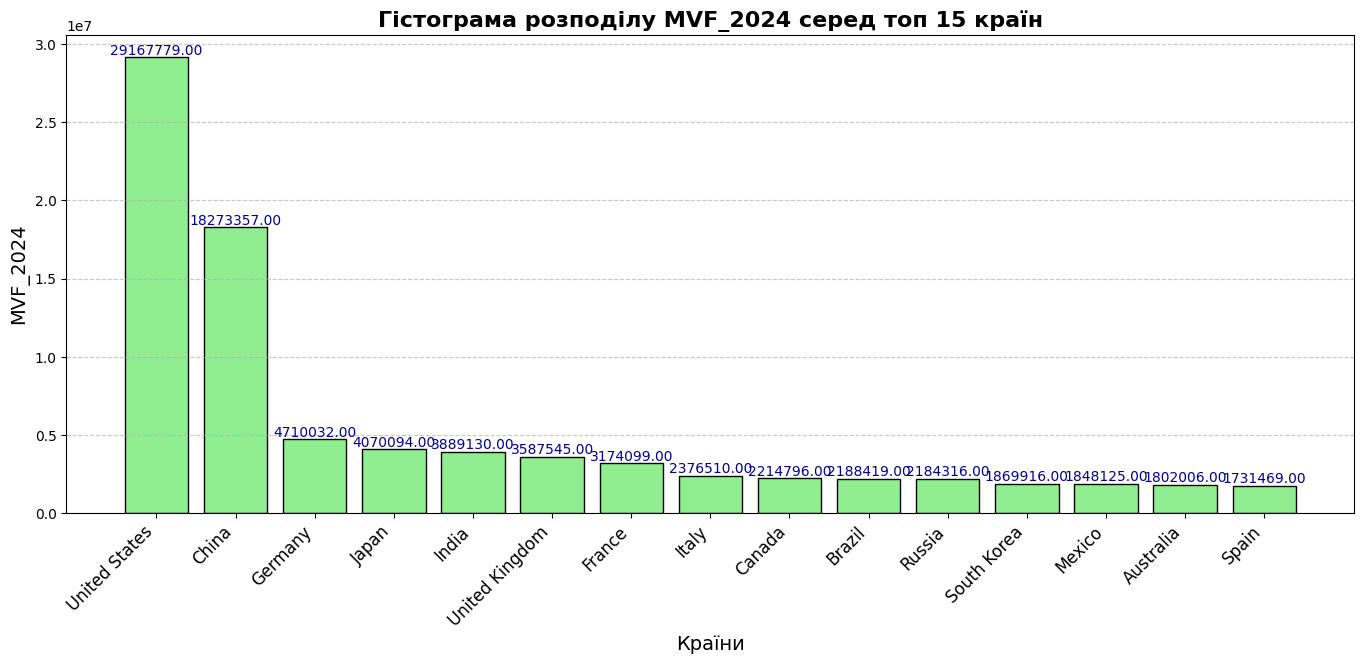

In [31]:
import matplotlib.pyplot as plt

# Відфільтрувати рядки з "World"
filtered_df = df[~df['Country'].str.contains('World')]  # Використання логічного заперечення для фільтрації

# Вибірка топ 15 країн за значенням MVF_2024
top_countries_df = filtered_df.loc[filtered_df['MVF_2024'].nlargest(15).index]  # Використання .loc для відбору

# Налаштування графіку
plt.figure(figsize=(14, 7))  # Зміна розміру фігури для кращої візуалізації
bars = plt.bar(top_countries_df['Country'], top_countries_df['MVF_2024'], color='lightgreen', edgecolor='black')  # Зміна кольору барів та додавання країв

# Додавання заголовку та міток осей
plt.title('Гістограма розподілу MVF_2024 серед топ 15 країн', fontsize=16, fontweight='bold')  # Збільшення шрифту заголовка
plt.xlabel('Країни', fontsize=14)  # Збільшення шрифту підпису осі X
plt.ylabel('MVF_2024', fontsize=14)  # Збільшення шрифту підпису осі Y
plt.xticks(rotation=45, ha='right', fontsize=12)  # Зміна розміру шрифту підписів країн
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Зміна стилю сітки

# Додаємо підписи значень на кожному стовпці
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, color='darkblue')  # Зміна кольору тексту

plt.tight_layout(pad=2.0)  # Збільшення відстані між елементами
plt.show()


In [32]:
# 16. Розрахуйте частку кожної країни в загальному значенні для кожного року.
df['Share_MVF_2024'] = df['MVF_2024'] / df['MVF_2024'].sum()
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / df['WorldBank_2023'].sum()
df['Share_OON_2022'] = df['OON_2022'] / df['OON_2022'].sum()


<ipython-input-33-3f7662b3f7db>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Автоматичне налаштування відстаней


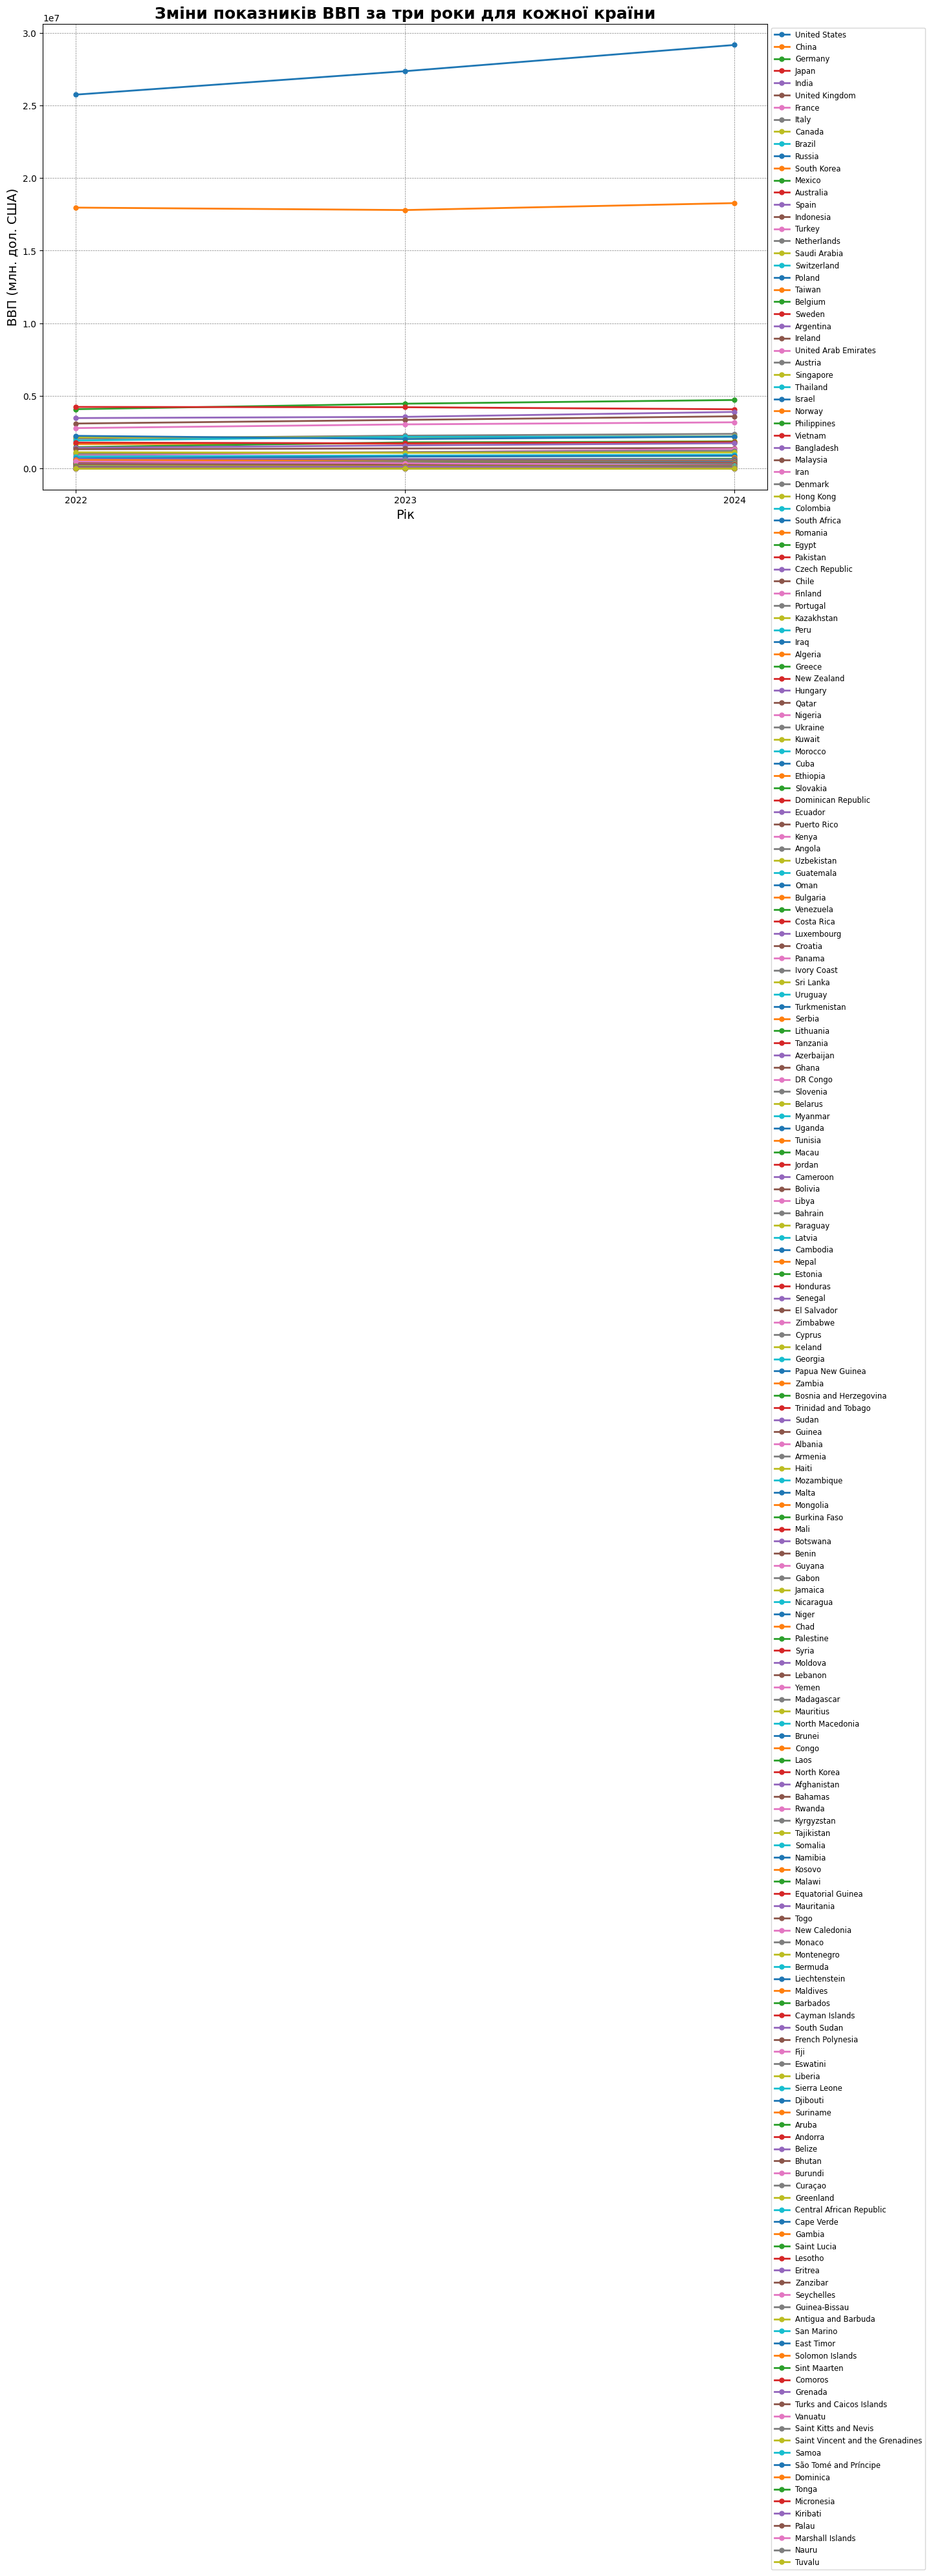

In [33]:
import matplotlib.pyplot as plt

# Відфільтрувати рядки з "World"
filtered_df = df.query('Country != "World"')  # Використання методу .query() для фільтрації

# Візуалізація змін в показниках для кожної країни за три роки
plt.figure(figsize=(16, 9))  # Зміна розміру фігури для кращої візуалізації

# Побудуємо графік для кожної країни
for _, row in filtered_df.iterrows():
    plt.plot(['2022', '2023', '2024'],
             [row['OON_2022'], row['WorldBank_2023'], row['MVF_2024']],
             marker='o', markersize=5, label=row['Country'], linewidth=2)  # Збільшення розміру маркерів та ширини лінії

# Додамо підписи осей і заголовок
plt.title('Зміни показників ВВП за три роки для кожної країни', fontsize=18, fontweight='bold')  # Збільшення шрифту заголовка
plt.xlabel('Рік', fontsize=14)  # Збільшення шрифту підпису осі X
plt.ylabel('ВВП (млн. дол. США)', fontsize=14)  # Збільшення шрифту підпису осі Y

# Відображаємо легенду з невеликим збільшенням відстані
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize='small')  # Зміна позиції легенди

# Відображаємо сітку
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Зміна стилю сітки

# Налаштування відступів для уникнення помилки
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

# Оформляємо графік для зручного перегляду
plt.tight_layout()  # Автоматичне налаштування відстаней
plt.show()


Протягом виконання завдань було проведено обробку та аналіз даних про ВВП країн за три різні роки. Спочатку здійснено попередній аналіз, включаючи обробку пропущених значень і перевірку наявності дублікатів. Далі були обчислені різниці між показниками за різні роки. На основі отриманих даних побудовано графіки, що демонструють розподіл ВВП серед країн та зміни показників у часі. Було виявлено країни з найбільшими та найменшими значеннями, а також ті, які демонструють стабільне зростання або спад.

In [ ]:
# 2 ЗАВДАННЯ

In [ ]:
from google.colab import files

uploaded = files.upload()

titanic_df = pd.read_csv('titanic.csv')

In [ ]:
# 1. Перегляд перших 5 рядків
print("Перші 5 рядків датасету:")
print(titanic_df.head())

Перші 5 рядків датасету:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
# 2. Визначення розміру датасету
print("\nРозмір датасету:")
print(titanic_df.shape)


Розмір датасету:
(418, 12)


In [ ]:
# 3. Визначення типу даних
print("\nТипи даних:")
print(titanic_df.dtypes)


Типи даних:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# 4. Визначення наявності пропущених значень
print("\nПропущені значення до заміни:")
print(titanic_df.isnull().sum())

# Замінити пропущені значення на середнє значення лише для числових стовпців
numeric_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns
titanic_df[numeric_columns] = titanic_df[numeric_columns].fillna(titanic_df[numeric_columns].mean())

# Перевірка, чи залишилися пропущені значення
print(titanic_df.isnull().sum())


Пропущені значення до заміни:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# 5. Перевірити знову наявність пропущених значень
print("\nПропущені значення після заміни:")
print(titanic_df.isnull().sum())


Пропущені значення після заміни:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# 6. Перевірка наявності дублікатів
duplicates = titanic_df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

# Видалення дублікатів, якщо вони є
if duplicates > 0:
    titanic_df.drop_duplicates(inplace=True)


Кількість дублікатів: 0


In [ ]:
# 7. Виведення описової статистики
print("\nОписова статистика:")
print(titanic_df.describe())


Описова статистика:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [ ]:
# 8. Видалити стовпчик Cabin
print("\n8. Видалення стовпчика Cabin:")
titanic_df.drop('Cabin', axis=1, inplace=True)


8. Видалення стовпчика Cabin:


In [ ]:
# 9. Сформувати датасет з обраними стовпцями
print("\n9. Формування датасету з обраними стовпцями:")
selected_columns_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
print(selected_columns_df.head())


9. Формування датасету з обраними стовпцями:
   Survived  Pclass     Sex   Age     Fare
0         0       3    male  34.5   7.8292
1         1       3  female  47.0   7.0000
2         0       2    male  62.0   9.6875
3         0       3    male  27.0   8.6625
4         1       3  female  22.0  12.2875


In [ ]:
# 10. Замінити бінарні ознаки (Стать) на 0 і 1
selected_columns_df['Sex'] = selected_columns_df['Sex'].map({'male': 0, 'female': 1}).copy()


In [ ]:
# 11. Перевірка кількості пропущених даних
print("\nПропущені значення після обробки:")
print(selected_columns_df.isnull().sum())


Пропущені значення після обробки:
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [ ]:
# 12. Перші 5 рядків після обробки
print("\nПерші 5 рядків після обробки:")
print(selected_columns_df.head())



Перші 5 рядків після обробки:
   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


In [ ]:
# 13. Останні 5 рядків після обробки
print("\nОстанні 5 рядків після обробки:")
print(selected_columns_df.tail())


Останні 5 рядків після обробки:
     Survived  Pclass  Sex       Age      Fare
413         0       3    0  30.27259    8.0500
414         1       1    1  39.00000  108.9000
415         0       3    0  38.50000    7.2500
416         0       3    0  30.27259    8.0500
417         0       3    0  30.27259   22.3583


In [ ]:
# 14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі.
print("\n14. Відсоток виживання залежно від статі:")
survival_by_sex = selected_columns_df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)


14. Відсоток виживання залежно від статі:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [ ]:
# 15. Обчисліть відсоток виживання для кожного класу (Pclass).
print("\n15. Відсоток виживання залежно від класу (Pclass):")
survival_by_class = selected_columns_df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)



15. Відсоток виживання залежно від класу (Pclass):
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [ ]:
# 16. Визначте середній вік тих, хто вижив, і тих, хто не вижив.
print("\n16. Середній вік тих, хто вижив і хто не вижив:")
age_by_survival = selected_columns_df.groupby('Survived')['Age'].mean()
print(age_by_survival)


16. Середній вік тих, хто вижив і хто не вижив:
Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


In [ ]:
# 17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи.
# Додаємо новий стовпець для групування за тарифами
selected_columns_df['FareGroup'] = pd.qcut(selected_columns_df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Обчислюємо рівень виживання для кожної групи
survival_by_fare_group = selected_columns_df.groupby('FareGroup', observed=False)['Survived'].mean() * 100

print(survival_by_fare_group)


FareGroup
Low          26.315789
Medium       27.083333
High         39.047619
Very High    53.398058
Name: Survived, dtype: float64


In [ ]:
# 18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass).
print("\n18. Середній тариф для кожного класу:")
fare_by_class = selected_columns_df.groupby('Pclass')['Fare'].mean()
print(fare_by_class)


18. Середній тариф для кожного класу:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


In [ ]:
# 19. Обчисліть середній вік пасажирів для кожного класу (Pclass).
print("\n19. Середній вік пасажирів для кожного класу:")
age_by_class = selected_columns_df.groupby('Pclass')['Age'].mean()
print(age_by_class)


19. Середній вік пасажирів для кожного класу:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64



20. Гістограма розподілу віку для тих, хто вижив, і тих, хто не вижив:


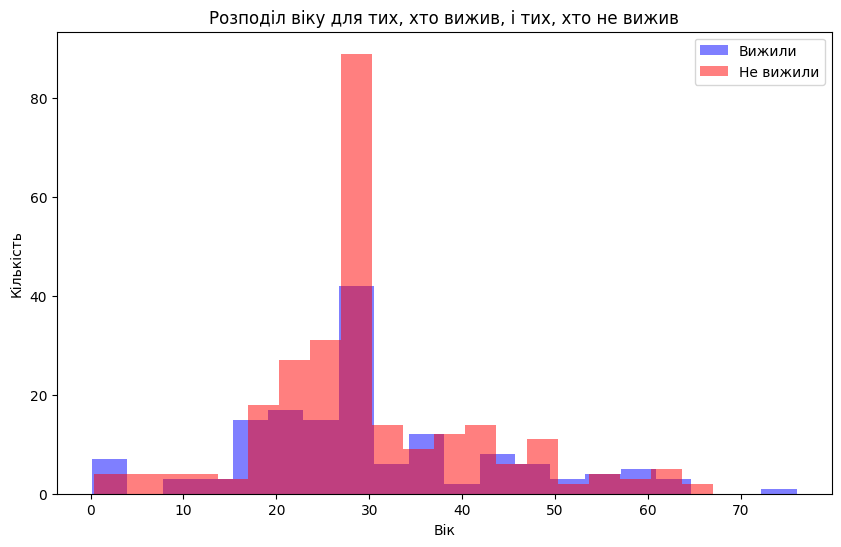

In [ ]:
# 20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив.
import matplotlib.pyplot as plt

print("\n20. Гістограма розподілу віку для тих, хто вижив, і тих, хто не вижив:")
plt.figure(figsize=(10, 6))
selected_columns_df[selected_columns_df['Survived'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='blue', label='Вижили')
selected_columns_df[selected_columns_df['Survived'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='red', label='Не вижили')
plt.title('Розподіл віку для тих, хто вижив, і тих, хто не вижив')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend()
plt.show()


In [ ]:
# 21. Обчисліть відсоток виживання для кожної комбінації статі та класу.
print("\n21. Відсоток виживання для кожної комбінації статі та класу:")
survival_by_sex_class = selected_columns_df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print(survival_by_sex_class)


21. Відсоток виживання для кожної комбінації статі та класу:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [ ]:
# 22. Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare).
print("\n22. Кореляція між числовими змінними:")
correlation_matrix = selected_columns_df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print(correlation_matrix)


22. Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


In [ ]:
'''
Аналіз даних пасажирів "Титаніка" виявив, що жінки мали значно вищі шанси на виживання в порівнянні з чоловіками. Також пасажири першого класу демонстрували найвищий рівень виживання серед усіх класів. Вік пасажирів також впливав на шанси виживання: молодші пасажири мали трохи більші шанси на порятунок. Крім того, тариф, сплачений пасажирами, був пов'язаний з їх виживанням: чим вищим був тариф, тим більшими були шанси на виживання.
'''

'\nАналіз даних пасажирів "Титаніка" показав, що жінки мали значно вищі шанси на виживання, \nніж чоловіки. \nТакож пасажири першого класу мали найвищий рівень виживання порівняно з іншими класами.\nВік пасажирів впливав на виживання, \nпричому молодші пасажири мали трохи вищі шанси вижити. \nТариф, який платили пасажири, також був пов\'язаний з виживанням: \nчим вищий тариф, тим більші були шанси на виживання.\n'